Nombre: Jessica Méndez

Materia: PLN y Visión Computacional

29 de Enero de 2023


---



---



**Tecmilenio y la creadora del presente notebook, no guarda relación alguna con las marcas mencionadas como ejemplo. Las marcas son propiedad de sus titulares conforme a la legislación aplicable, se utilizan con fines académicos y didácticos, por lo que no existen fines de lucro, relación publicitaria o de patrocinio.

---



# Instalación de Paquetes

Una vez se instale la librería NLTK, es posible acceder fácilmente a recursos léxicos y comenzar con el procesamiento de textos. NLTK incluye una pequeña selección de textos del Proyecto Gutenberg, que contiene unos 60,000 libros electrónicos gratuitos.

In [ ]:
pip install NLTK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Librerías que usaremos

Para acceder a este corpus, se debe cargar la librería NLTK previamente instalada y descargar el corpus del Proyecto Gutenberg. Adicional a ello, es posible enlistar los archivos incluidos en el corpus.

In [ ]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords


In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Al utilizar la función words() del objeto gutenberg en el paquete corpus del NLTK, se podrá tener acceso al recurso que se desee, por ejemplo “La tragedia de Hamlet, príncipe de Dinamarca” de William Shakespeare y así, obtener información estadística sobre el texto.

In [ ]:
hamlet = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')

Se puede observar la cantidad de caracteres, palabras y oraciones del texto, así como la longitud promedio de una palabra, de una oración y la cantidad de veces que cada elemento del vocabulario aparece en el texto en promedio, es decir, la diversidad léxica del texto. Es importante notar que con estos estadísticos se obtiene información sobre características del idioma (longitud de la palabra) o características particulares del autor (longitud de oración promedio y diversidad léxica).

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

El uso de la función **raw()** permite acceder al texto tal cual, sin algún tipo de procesamiento lingüístico. Por ejemplo, **len(gutenberg.raw('shakespeare-hamlet.txt'))** devuelve la cantidad de letras en el texto, incluyendo los espacios en blanco entre las palabras. 

La función **sents()** separa al texto en oraciones que se construyen a partir de una lista de palabras.



In [ ]:

num_caracteres = len(gutenberg.raw('shakespeare-hamlet.txt'))
num_palabras = len(gutenberg.words('shakespeare-hamlet.txt'))
num_oraciones = len(gutenberg.sents('shakespeare-hamlet.txt'))
num_vocab = len(set([w.lower() for w in gutenberg.words('shakespeare-hamlet.txt')]))

print('Cantidad de caracteres: ',num_caracteres )
print('Cantidad de palabras: ',num_palabras )
print('Cantidad de oraciones: ',num_oraciones )
print('Longitud promedio de una palabra: ',int(num_caracteres/num_palabras) )
print('Longitud promedio de una oracion: ',int(num_palabras/num_oraciones) )
print('Diversidad léxica: ',int(num_palabras/num_vocab) ) 

Cantidad de caracteres:  162881
Cantidad de palabras:  37360
Cantidad de oraciones:  3106
Longitud promedio de una palabra:  4
Longitud promedio de una oracion:  12
Diversidad léxica:  7


El Corpus Brown fue el primer corpus electrónico de un millón de palabras en inglés, creado en 1961 en la Universidad de Brown. Contiene textos de 500 fuentes y las fuentes se han categorizado por género, como noticias, editoriales, etc.

In [ ]:
oraciones_macbeth = gutenberg.sents('shakespeare-hamlet.txt')
oraciones_macbeth[1037]

['the',
 'beauty',
 'of',
 'the',
 'world',
 ',',
 'the',
 'Parragon',
 'of',
 'Animals',
 ';',
 'and',
 'yet',
 'to',
 'me',
 ',',
 'what',
 'is',
 'this',
 'Quintessence',
 'of',
 'Dust',
 '?']

Es posible acceder al corpus ya sea como una lista de palabras o una lista de oraciones (donde cada oración es, en sí misma, una lista de palabras). Opcionalmente, se puede especificar categorías o archivos particulares para leer.




In [ ]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Esta pantalla se obtuvo directamente del software que se está explicando en la computadora, para fines educativos.

El Corpus Brown es un recurso útil para estudiar las diferencias sistemáticas entre géneros, conocida como estilística o estudio del estilo. A continuación puedes notar la diferencia en el uso de los verbos modales en textos de noticias y de romance.

In [ ]:
noticias = brown.words(categories='news')
dist_frec = nltk.FreqDist([w.lower() for w in noticias])
verbo_modal = ['can','could','may','migth','must','will']
for m in verbo_modal:
  print(m + ":", dist_frec[m],)

can: 94
could: 87
may: 93
migth: 0
must: 53
will: 389


In [ ]:
noticias = brown.words(categories='romance')
dist_frec = nltk.FreqDist([w.lower() for w in noticias])
verbo_modal = ['can','could','may','migth','must','will']
for m in verbo_modal:
  print(m + ":", dist_frec[m],)

can: 79
could: 195
may: 11
migth: 0
must: 46
will: 49


Los verbos modales son verbos auxiliares que expresan una opinión sobre si algo es posible o probable, también son utilizados para pedir permiso o hacer algún tipo de petición ohablar de habildiad, orden, obligación o consejo. 

En los resultados anteriores se observa que el verbo modal más utilizado en textos de noticias es will y en textos de romance es colud y este tipo de información puede ser utilizada para establecer distinciones entre géneros en un texto escrito.

# Procesamiento de texto puro

En está sección se identificará que hace que un texto sea distinto, utilizando métodos automáticos para encontrar palbaras y espresiones características de un texto.

Una forma de identificar cuáles son las palabras que proporcionan más información sobre un texto es contando las veces que la palabra se utiliza dentro dle texto. 

La distribución de frecuencias, indica la periodicidad de cada elemento de un vocabulario en un texto. El término distribución indica como se reparte el número total de palabras en el texto.

A continuación se pueden observar las 20 palabras más frecuentes en la novela "Emma" de Jane Austen y también un fragmento de aquellas palabras que solo aparecen una sola vez, conocidas como hapax o hápax legómenon.

In [ ]:
palabras = gutenberg.words('austen-emma.txt')
dist_frec = nltk.FreqDist([w.lower() for w in palabras])
dist_frec.most_common(20)

[(',', 11454),
 ('.', 6928),
 ('to', 5239),
 ('the', 5201),
 ('and', 4896),
 ('of', 4291),
 ('i', 3178),
 ('a', 3129),
 ('it', 2528),
 ('her', 2469),
 ('was', 2398),
 ('she', 2340),
 (';', 2199),
 ('in', 2188),
 ('not', 2140),
 ('"', 2004),
 ('you', 1980),
 ('be', 1975),
 ('that', 1806),
 ('he', 1806)]

In [ ]:
dist_frec.hapaxes()

['austen',
 '1816',
 ']',
 'vex',
 'indistinct',
 'caresses',
 'nominal',
 'mildness',
 'impose',
 'esteeming',
 'disadvantages',
 'misfortunes',
 'mournful',
 'debt',
 'tenderer',
 'valetudinarian',
 'amounting',
 'equals',
 'lieu',
 'awoke',
 'chatted',
 'housemaid',
 'curtseys',
 'needlework',
 'lock',
 'bangs',
 'speck',
 'rained',
 'gainer',
 'punctual',
 'deathbed',
 'broadway',
 'drizzle',
 'mitchell',
 ',\'"',
 'supposes',
 'delicately',
 'encouragements',
 'grievously',
 'fitted',
 'homely',
 'embodied',
 'military',
 'dissuaded',
 'pursue',
 'luxuries',
 'poorer',
 'lingering',
 'kindred',
 'competence',
 'portionless',
 'tyrannic',
 'choose',
 'avowed',
 'adoption',
 'assume',
 'capricious',
 'boasts',
 'dissentient',
 'prized',
 'ennui',
 'companionableness',
 'feeble',
 'hindrance',
 'ceasing',
 'teased',
 'apothecary',
 'bias',
 'newly',
 'unfrequently',
 'exchanging',
 'quadrille',
 'untoward',
 'predicament',
 'frighten',
 'cleverness',
 'universal',
 'quicksighted',
 '

Es posible que de las 20 palabras más frecuentes se pueda inferir algo sobre el texto, por ejemplo, las palabras her y she aparecen cerca de 2500 veces cada una y eso puede sugerir que en el texto se habla de una persona del sexo femenino.

Si se grafica la distribución de frecuencias acumulada, se observa que tan solo esas 20 palabras más frecuentes son casi la mitad del libro (figura 8).

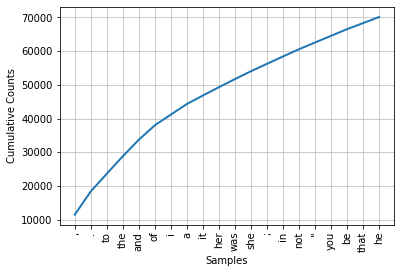

In [ ]:
dist_frec.plot(20, cumulative=True)

In [ ]:
int(len(palabras)/2)

96213

En un texto, una colocación es una secuencia de dos o más palabras que ocurren juntas con una frecuencia inusual, por ejemplo, agua dulce, día festivo, juego de mesa u ojo morado. En tal sentido, una colocación es la combinación frecuente de palabras en la que una palabra requiere la presencia de otra para expresar una idea específica.

Una característica de las colocaciones es que son resistentes a la sustitución con palabras que tienen acepciones similares, por ejemplo, ojo negro es rarísimo que se utilice.

El análisis de colocaciones evalúa las coocurrencias y la frecuencia de dos o más palabras en un contexto dado. Para identificar las colocaciones, se requiere extraer de un texto todos los pares de palabras, conocidos como bigramas. NLTK tiene la función **bigrams()** que construye una lista de pares de palabras consecutivas en un texto. 

In [ ]:
oracion=['Maestría','en','Inteligencia','Artificial','Procesamiento','de','Lenguaje','Natural','Universidad','Tecmilenio','.']

In [ ]:
list(nltk.bigrams(oracion))

[('Maestría', 'en'),
 ('en', 'Inteligencia'),
 ('Inteligencia', 'Artificial'),
 ('Artificial', 'Procesamiento'),
 ('Procesamiento', 'de'),
 ('de', 'Lenguaje'),
 ('Lenguaje', 'Natural'),
 ('Natural', 'Universidad'),
 ('Universidad', 'Tecmilenio'),
 ('Tecmilenio', '.')]

Adicionalmente, es posible utilizar distribuciones de frecuencia condicionales para determinar la cantidad de veces que una palabra aparece con otra en el texto. Por ejemplo, en “Emma” de Jean Austen, la palabra “Emma” aparece junto a was o could alrededor de 60 veces, así como had o felt aproximadamente 30 veces.

In [ ]:
palabras = gutenberg.words('austen-emma.txt')
bigramas = nltk.bigrams(palabras)
cfd = nltk.ConditionalFreqDist(bigramas)

In [ ]:
cfd['Emma']

FreqDist({',': 173, "'": 80, 'was': 64, 'could': 61, '.': 44, 'had': 36, ';': 24, 'felt': 19, 'found': 12, 'and': 11, ...})

Reflexiona:



*   ¿Cuáles son los corpora y recursos léxicos que serían útiles para analizar la forma de escribir entre autores, los periodos en los que se escribieron ciertos textos o el género del autor que lo escribió?
*   Te seleccionan para construir un analizador de sentimientos cuyo objetivo es predecir la opinión (negativa o positiva) expresada en un texto. ¿Qué información deberá tener el analizador para etiquetar un texto como positivo o negativo? 

*   ¿Cuál sería la entrada del analizador?
*   ¿Cuál sería su salida?









